In [1]:
import numpy as np
import pImpactR as impact
from copy import deepcopy as copy
import matplotlib.pyplot as plt

In [2]:
input_fname = 'test.original.in'
np.set_printoptions(formatter={'float': lambda x: format(x, '1.2E')})

In [3]:
beam, lattice = impact.readInputFile(input_fname);
ke = beam.kinetic_energy
mass = beam.mass
freq = beam.frequency

turns = 2
betx = 1.892632003629
alfx = 1.37638192047
emitxN = 1.0e-6 * 3.0/2.0
n_particles = 200000 #!!!!

beam.nCore_y = 4
beam.nCore_z = 4
beam.distribution.emitx = emitxN
beam.n_particles = n_particles

reading ImpactZ input file (test.original.in)
  : mpi task info .............................done
  : simulation control parameters .............done
  : space charge field solver, mesh info ......done
  : dist-type,restart,subcycle,#of state ......done
  : Multiple Charge State info ................done
  : particle distribution info ................done
  : beam reference orbit info .................done
  : converting impact dist to twiss param......done
  : lattice info ..............................done


In [4]:
lattice = [ item for item in lattice if not item.type == 'write_raw_ptcl' ]
lattice.pop(0);
lattice[0].turns=turns
lattice[1].n_sckick = 100

In [5]:
cp partcl_IOTA.data partcl.data

In [6]:
beam.distribution.distribution_type = 'ReadFile'
impact.writeInputFile(beam,lattice)
impact.run(beam)

0

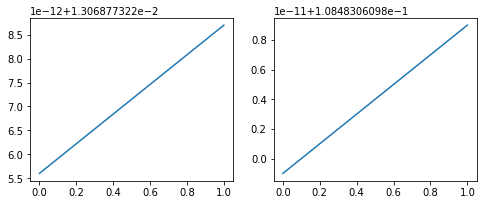

In [7]:
Inv = np.loadtxt('fort.81')
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(Inv[:,1])
plt.subplot(1,2,2)
plt.plot(Inv[:,2])

In [8]:
L=0.0
for item in lattice:
    if 'length' in item.keys():
        L = L + item.length

Y=impact.readRMS('y')        
N = np.argwhere(np.mod(Y.s,L)==0.0)
N=N[:,0]

In [9]:
M=[]
z = 0.0
for i in range(len(N)):
    if z < Y.s[N[i]]:
        M.append(N[i-1])
        z = Y.s[N[i]]    
M=np.array(M)
print(Y.s[M[:10]])
print(Y.s[M[-1]])

[0.00E+00 2.00E+00]
2.0


In [10]:
Z  = Y.s[M]
Yc = Y.centroid_y[M] 
Pc = Y.centroid_py[M]
Yc = Yc -1j*(betx*Pc+alfx*Yc)

In [13]:
pDataInit = impact.readParticleData(-111110,ke,mass,freq)
pDataOut  = impact.readParticleData(-111111,ke,mass,freq)

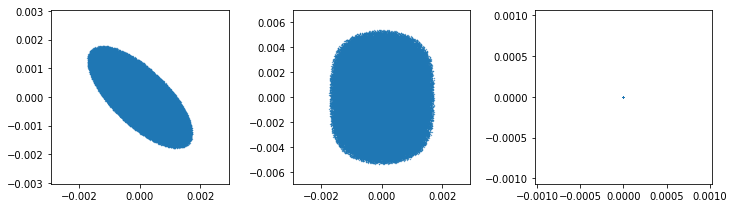

In [14]:
plt.figure(figsize=[10.3,3])
plt.subplot(1,3,1)
plt.scatter(pDataInit[:,0],pDataInit[:,1],s=0.1)
plt.subplot(1,3,2)
plt.scatter(pDataInit[:,0],pDataInit[:,2],s=0.1)
plt.subplot(1,3,3)
plt.scatter(pDataInit[:,4],pDataInit[:,5],s=0.1)
plt.tight_layout()

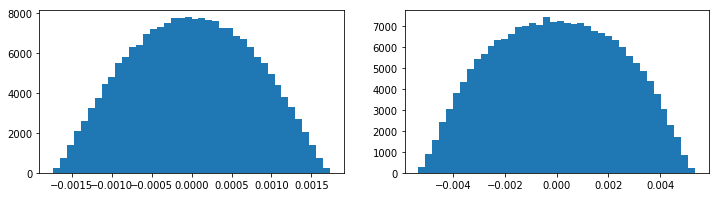

In [15]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(pDataInit[:,0],bins=40);
plt.subplot(1,2,2)
plt.hist(pDataInit[:,2],bins=40);

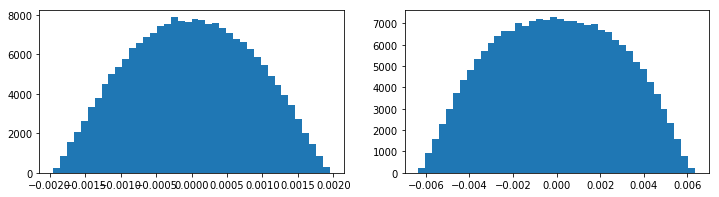

In [16]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.hist(pDataOut[:,0],bins=40);
plt.subplot(1,2,2)
plt.hist(pDataOut[:,2],bins=40);

In [17]:
cat test.in

!================= Beam & Control Parameters ================= 
4 4 
6 200000 1 0 1 
32 32 32 1 10.0 10.0 100.0 
23 0 0 1 
200000 
0.0 
-1.95692801440299e-06 
0.0022777505820814944 0.00041406213098906934 0.0 1.0 1.0 0.0 0.0 
0.0007108541 0.000129223 0.0 1.0 1.0 0.0 0.0 
2.2092772151898727 1.065789e-10 0.0 1.0 1.0 0.0 0.0 
0.0 150000000.0 511005.0 -1.0 30000000.0 0.0 
!========================== Lattice ========================== 
0.0 0 0 -16 0.0 2 / 
2.0 100 100 6 0.45 0.009 0.3 10.0 / 
0.0 0 0 -46 0.0 2.0 0.3 0.0 / 
